# Assignment 3

**Nama : Ninda Nurismiranda**

**Program : Introduction to Python for Data Science**

**Kode Peserta : PYTN-KS01-010**

Dataset : bank.csv

## Import module

In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
pd.set_option("display.max.columns", None)

## Create Function

In [3]:
# function evaluation model 
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Prediction Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Calculate precision, recall, f1-score, and kappa score
    precision = metrics.precision_score(y_test, y_pred)

    # Caclculate recall 
    recall = metrics.recall_score(y_test, y_pred)
    # calculate f1-score
    f1_score = metrics.f1_score(y_test, y_pred)
    # calculate kappa score 
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}
    # return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
    #         'cm': cm}        

## Import Dataset

Assignment 3 menggunakan dataset bank yang diperoleh dari Kaggle. Dataset ini adalah bank-full.csv . Read dataset excel dengan menggunakan metode pandas read_excel() sebagai berikut :

In [4]:
import xlrd
df = pd.read_excel("bank-full.xlsx")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dataset tersebut berisi variabel-variabel dengan keterangan sebagai berikut :
- 1. — age (numeric)
- 2 — job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
- 3 — marital : marital status (categorical: ‘divorced’, ‘married’, ‘single’, ‘unknown’; note: ‘divorced’ means divorced or widowed)
- 4 — education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
- 5 — default: has credit in default? (categorical: ‘no’, ‘yes’, ‘unknown’)
- 6 — housing: has housing loan? (categorical: ‘no’, ‘yes’ ,’unknown’)
- 7 — loan: has personal loan? (categorical: ‘no’, ‘yes’, ‘unknown’)

#### related with the last contact of the current campaign:
- 8 — contact: contact communication type (categorical: ‘cellular’, ‘telephone’)
- 9 — month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
- 10 — day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
- 11 — duration: last contact duration, in seconds (numeric).
- 12 — campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 — pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 — previous: number of contacts performed before this campaign and for this client (numeric)
- 15 — poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)

#### Output variable (desired target):
- 16 — y — has the client subscribed a term deposit? (binary: ‘yes’, ‘no’) 



## Prepocessing Dataset

In [6]:
# Print the dimension of data set
df.shape

(45211, 17)

Dataset tersebut terdiri dari 84548 baris dan 22 kolom

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Change coloum y menjadi deposit

In [8]:
df_bank = df.rename(columns={'y': 'deposit'}) 

In [9]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### Distribusi class 
yang ideal distribusi nya 50:50 

In [10]:
df_bank['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

### Mengecek Kesesuaian Data

In [11]:
#Melihat tipe objek masing-masing kolom
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
#Ubah type data menjadi categorical
categorical = ["job","marital","education","default","housing","loan","contact","poutcome","deposit"]

for col in categorical: 
    df_bank[col] = df_bank[col].astype("category")

In [13]:
## Cek Kembali tipe data
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  deposit    45211 non-null  category
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


In [14]:
# get number of unique values for each column
counts = df_bank.nunique()
counts

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

In [15]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Mengidentifikasi Duplikasi Data

In [16]:
dups = df_bank.duplicated()
print(dups.any())

False


Setelah di cek mengenai duplikasi data, hasilnya menyatakan "False" yang artinya tidak terdapat duplikasi data pada dataset.

In [17]:
df_bank.duplicated().sum()

0

#### Mengecek Missing Value Pada Dataset

In [18]:
#Mengecek missing value dari dataset
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [19]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Tidak ada data yang missing

### Scalling Data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank[num_cols] = scaler.fit_transform(df_bank[num_cols])

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


### Encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
kol_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [22]:
# process encode categorical data 
df_encode = pd.DataFrame(encoder.fit_transform(df_bank[kol_cat]))

##print(df_encode)
df_encode.columns = encoder.get_feature_names(kol_cat)
print(df_encode.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [23]:
# drop 
df_bank = df_bank.drop(kol_cat ,axis=1)
print(df_bank)

            age   balance       day  duration  campaign     pdays  previous  \
0      1.606965  0.256419 -1.298476       261 -0.569351 -0.411453 -0.251940   
1      0.288529 -0.437895 -1.298476       151 -0.569351 -0.411453 -0.251940   
2     -0.747384 -0.446762 -1.298476        76 -0.569351 -0.411453 -0.251940   
3      0.571051  0.047205 -1.298476        92 -0.569351 -0.411453 -0.251940   
4     -0.747384 -0.447091 -1.298476       198 -0.569351 -0.411453 -0.251940   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.947747 -0.176460  0.143418       977  0.076230 -0.411453 -0.251940   
45207  2.831227  0.120447  0.143418       456 -0.246560 -0.411453 -0.251940   
45208  2.925401  1.429593  0.143418      1127  0.721811  1.436189  1.050473   
45209  1.512791 -0.228024  0.143418       508  0.399020 -0.411453 -0.251940   
45210 -0.370689  0.528364  0.143418       361 -0.246560  1.476138  4.523577   

      deposit  
0          no  
1          no  
2  

In [24]:
df_bank = pd.concat([df_encode, df_bank], axis=1)
df_bank

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,yes
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,yes
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,yes
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,no


In [25]:
# Encode target value
df_bank['deposit'] = df_bank['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print(df_bank.shape)
df_bank.head()

(45211, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,0


### Memisahkan feature dan Target

In [26]:
# Select Features
feature = df_bank.drop('deposit', axis=1)

In [27]:
# Select Target
target = df_bank['deposit']

### Split Dataset untuk data traning dan data test 

80:20

In [29]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (36168, 51)
Shape testing feature: (9043, 51)
Shape training label: (36168,)
Shape training label: (9043,)


### Logistik Regression

In [30]:
from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
eval_lr = evaluate_model(model_lr, X_test, y_test)
print ('Logistic Regression Accuracy:', eval_lr['accuracy'])

Logistic Regression Accuracy: 0.900364923144974


In [32]:
# Display Confussion matriks
print('Confusion matrix:', eval_lr['cm'])

Confusion matrix: [[7823  170]
 [ 731  319]]


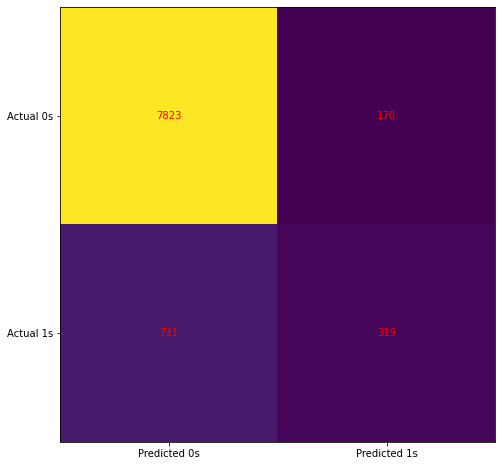

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_lr['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_lr['cm'][i, j], ha='center', va='center', color='red')
plt.show()

### K-Nearest Neighbors

In [34]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
model_knn.fit(X_train, y_train)

#Predict the response for test dataset
eval_knn = evaluate_model(model_knn, X_test, y_test)

In [35]:
print('KNN Accuracy:', eval_knn['accuracy'])

KNN Accuracy: 0.8894172287957536


In [36]:
# Display Confussion matriks
print('Confusion matrix:', eval_knn['cm'])

Confusion matrix: [[7745  248]
 [ 752  298]]


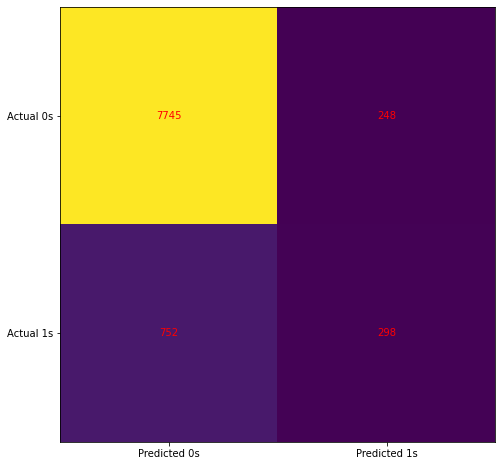

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_knn['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_knn['cm'][i, j], ha='center', va='center', color='red')
plt.show()

### Support Vektor Machine

In [38]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [39]:
svm_pred =svm_model.predict(X_test)

In [40]:
print("Accuracy:", metrics.accuracy_score(y_test, svm_pred))

Accuracy: 0.8893066460245493


In [41]:
# Display Confussion matriks
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, svm_pred)
print(matrix)

[[7876  117]
 [ 884  166]]


### Desicion Tree

In [42]:
from sklearn import tree
model_dt=tree.DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
eval_dtree = evaluate_model(model_dt, X_test, y_test)
print('DTree Accuracy:', eval_dtree['accuracy'])

DTree Accuracy: 0.8803494415570055


In [44]:
# Display Confussion matriks
print('Confusion matrix:', eval_dtree['cm'])

Confusion matrix: [[7420  573]
 [ 509  541]]


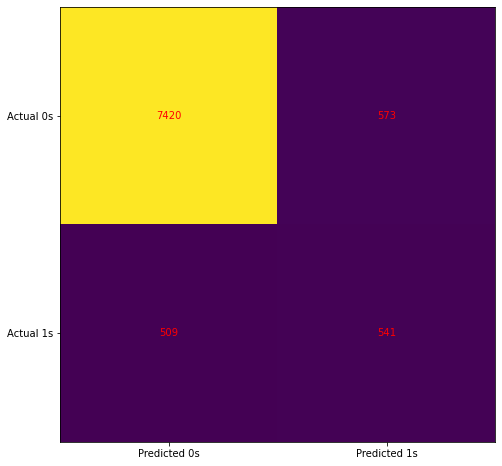

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_dtree['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_dtree['cm'][i, j], ha='center', va='center', color='red')
plt.show()

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
eval_rf = evaluate_model(model_rf, X_test, y_test)
print('RandomForest Accuracy:', eval_rf['accuracy'])

RandomForest Accuracy: 0.9055623133915736


In [48]:
# Display Confussion matriks
print('Confusion matrix:', eval_dtree['cm'])

Confusion matrix: [[7420  573]
 [ 509  541]]


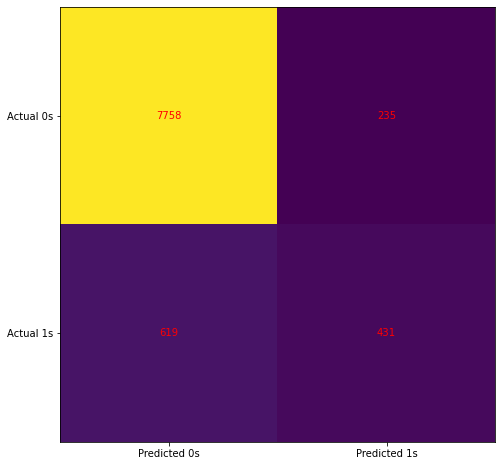

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_rf['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_rf['cm'][i, j], ha='center', va='center', color='red')
plt.show()

### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB 
model_nb=GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [51]:
eval_nb = evaluate_model(model_nb, X_test, y_test)
print('Naive Bayes Accuracy:', eval_nb['accuracy'])

Naive Bayes Accuracy: 0.8514873382726971


In [52]:
# Display Confussion matriks
print('Confusion matrix:', eval_dtree['cm'])

Confusion matrix: [[7420  573]
 [ 509  541]]


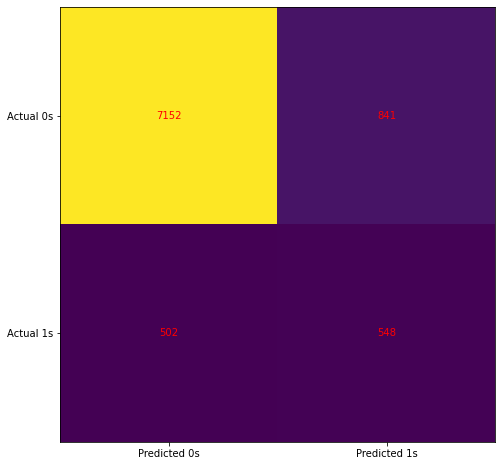

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_nb['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_nb['cm'][i, j], ha='center', va='center', color='red')
plt.show()

## Visualization

### Pie Chart

In [71]:
df_bank = df.rename(columns={'y': 'deposit'}) 

In [72]:
df_bank['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [73]:
labels = df_bank['deposit'].unique()
labels

array(['no', 'yes'], dtype=object)

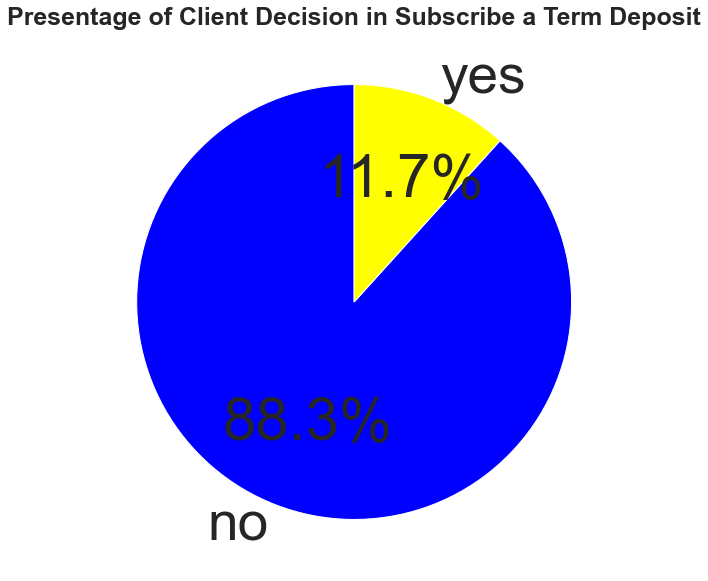

In [74]:
plt.figure(figsize=(20,10))
colors=['blue','yellow']
font = {'weight': 'bold',
       'size': 25,
       }

ax=plt.axes()
plt.title('Presentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab=plt.pie(df_deposit, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.show()

## Kesimpulan

Menurut saya algoritma yang paling sesuai adalah menggunakan algoritma rendom forest karena menghasilkan nilai akurasi yang paling besar dibandingkan dengan algoritma yang lainnya yaitu 0.9053411478491651. Walaupun Logistik regression sama menghasilkan nilai akurasi yang sama yaitu 0.900 tetapi tetap saja yang paling besar nilai akurasinya yaitu dengan menggunakan algoritma random forest. Nilai akurasi berkaitan dengan keakuratan atau ketelitian, jika nilai akurasi semakin besar maka pengukuran atau algoritma tersebut semakin baik. 